# Ballo ballo ballo (e canto), da capogiro

Un'altra interessante analisi è, sicuramente, legata al discorso della presenza di un corpo di ballo e/o di coristi durante l'esibizione: ci chiediamo, di conseguenza se anche questo possa essere stato, negli ultimi anni, una forte differenza legata alla presenza (o assenza) di questi elementi, comparandola alla posizione finale in classifica del brano stesso.

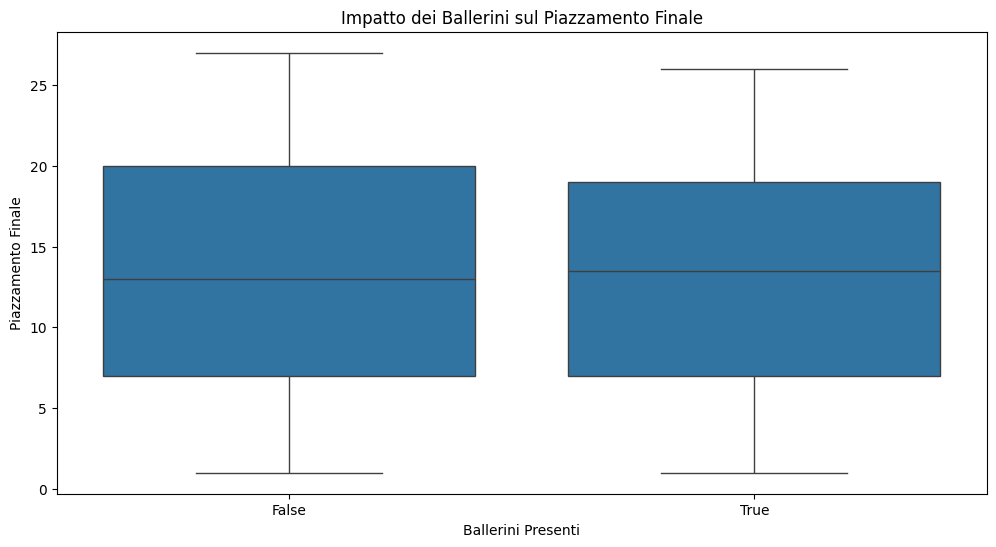

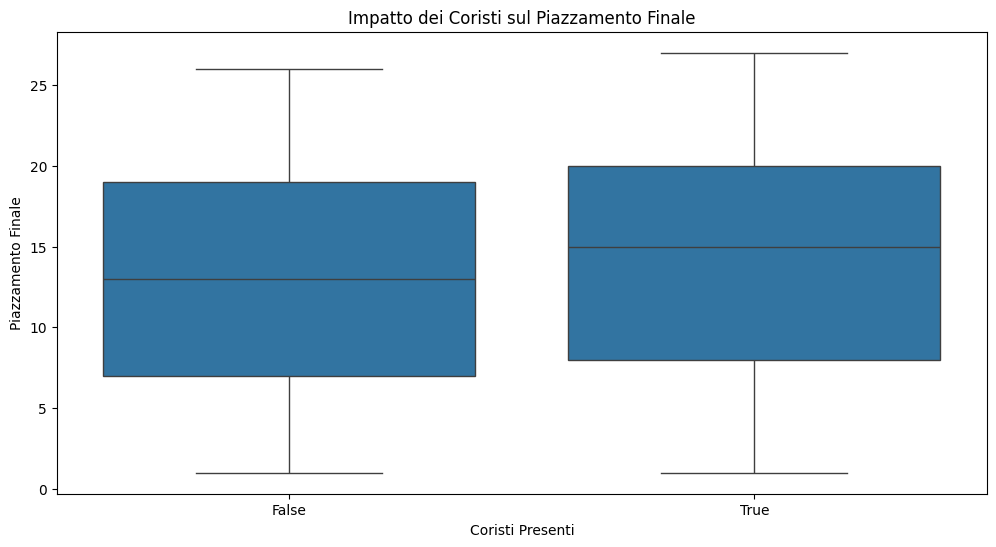

Mediana del Piazzamento Finale con e senza Ballerini:
backing_dancers
False    13.0
True     13.5
Name: final_place, dtype: float64

Mediana del Piazzamento Finale con e senza Coristi:
backing_singers
False    13.0
True     15.0
Name: final_place, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Carica il file CSV
file_path = './song_data.csv'
pd.set_option('display.max_rows', None)
data = pd.read_csv(file_path, encoding='latin1')

columns_of_interest = ['backing_dancers', 'backing_singers', 'final_place']
data_filtered = data[columns_of_interest].dropna()

# Converte le colonne in boolean per l'analisi
data_filtered['backing_dancers'] = data_filtered['backing_dancers'] > 0
data_filtered['backing_singers'] = data_filtered['backing_singers'] > 0

# Analizza l'impatto dei ballerini e dei coristi
plt.figure(figsize=(12, 6))
sns.boxplot(x='backing_dancers', y='final_place', data=data_filtered)
plt.title('Impatto dei Ballerini sul Piazzamento Finale')
plt.xlabel('Ballerini Presenti')
plt.ylabel('Piazzamento Finale')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='backing_singers', y='final_place', data=data_filtered)
plt.title('Impatto dei Coristi sul Piazzamento Finale')
plt.xlabel('Coristi Presenti')
plt.ylabel('Piazzamento Finale')
plt.show()

# Calcola la mediana del piazzamento finale per i gruppi con e senza ballerini
mediana_ballerini = data_filtered.groupby('backing_dancers')['final_place'].median()
print("Mediana del Piazzamento Finale con e senza Ballerini:")
print(mediana_ballerini)

# Calcola la mediana del piazzamento finale per i gruppi con e senza coristi
mediana_coristi = data_filtered.groupby('backing_singers')['final_place'].median()
print("\nMediana del Piazzamento Finale con e senza Coristi:")
print(mediana_coristi)

Qua, in linea con altri elementi detti finora, notiamo che la presenza dei ballerini e/o dei coristi in realtà inficia poco sul posizionamento in classifica di un determinato brano.

Ricordiamoci, però, che stiamo comunque analizzando un set di valori che vede protagoniste edizioni recenti, in cui la presenza di ballerini e coristi è qualcosa che, quasi, viene dato per aspettato durante l'esibizione stessa, a differenza dei primi anni in cui elementi come, il corpo di ballo, non era qualcosa di visto/molto presente.

In questo caso, infatti, vediamo come la mediana dei piazzamenti finali peggiora leggermente, in caso di presenza di un corpo di ballo (13.5esima posizione) diversamente dal non avere un corpo di ballo (13esima posizione).
Nel caso della mediana dei piazzamenti finali lato coristi, invece, la mediana si sposta ancora di più, favorendo nuovamente le esibizioni che preferiscono l'assenza di un coro (13esima posizione contro la 15esima in presenza di coristi).